In [1]:
import pickle as pkl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

# Grid
remember that the GT (the entire grid) is stored at the end of the ajd matrix. 

So if you want to take the GT, you have to extract the last 9 (3x3) nodes

In [2]:
with open('BA-2grid.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

[[0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]] [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1

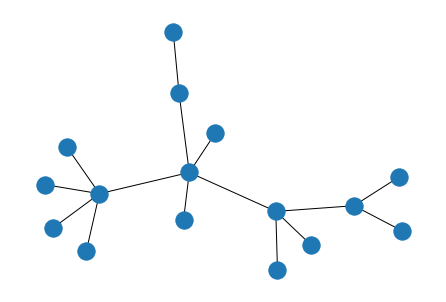

In [3]:
print(adjs[0],feas[0],labels[0])

g = nx.from_numpy_array(adjs[0])
nx.draw(g)

### get the GT of grid dataset

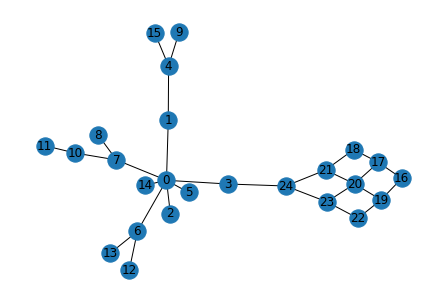

In [4]:
g = nx.from_numpy_array(adjs[-1])
nx.draw(g,with_labels=True)

In [5]:
start_GT = len(g.nodes())-9
GT_subgraph = nx.subgraph(g,range(start_GT,len(g.nodes())))

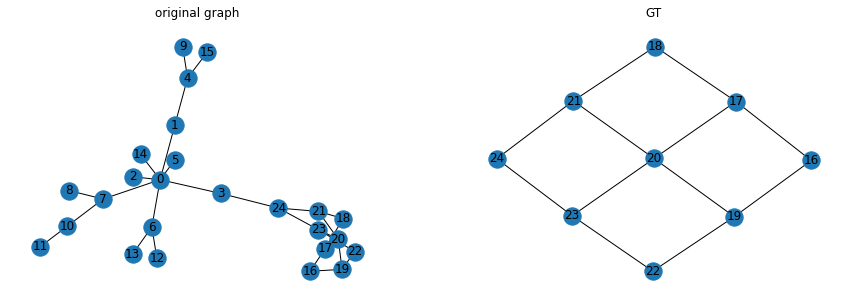

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("original graph")
nx.draw(g,with_labels=True)
plt.subplot(122)
plt.title("GT")
nx.draw(GT_subgraph,with_labels=True)

# grid house

In [7]:
with open('BA-2grid-house.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

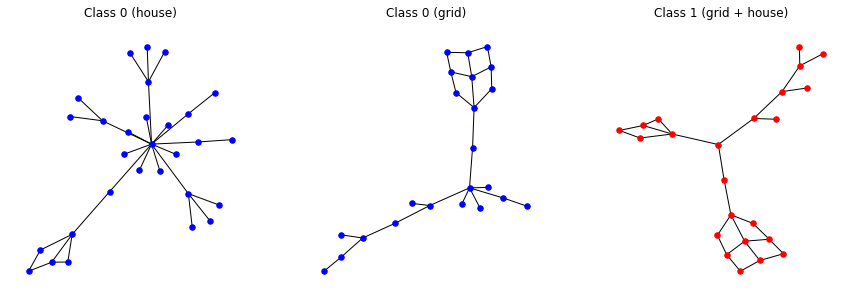

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Class 0 (house)")
g = nx.from_numpy_array(adjs[0])
nx.draw(g,pos=nx.spring_layout(g,seed=12),node_size=30,node_color="blue")
plt.subplot(132)
plt.title("Class 0 (grid)")
g = nx.from_numpy_array(adjs[2])
nx.draw(g,pos=nx.spring_layout(g,seed=12),node_size=30,node_color="blue")
plt.subplot(133)
plt.title("Class 1 (grid + house)")
g = nx.from_numpy_array(adjs[1])
nx.draw(g,pos=nx.spring_layout(g,seed=13),node_size=30,node_color="red")

### get the GT
to get the gt, we have to distinguish between class 0 and class 1.  

in **class 1**: it is easy, we know that the GT, are the last 14 (9+5) nodes.

In [9]:
g = nx.from_numpy_array(adjs[1])
start_GT = len(g.nodes())-14
GT_subgraph = nx.subgraph(g,range(start_GT,len(g.nodes())))

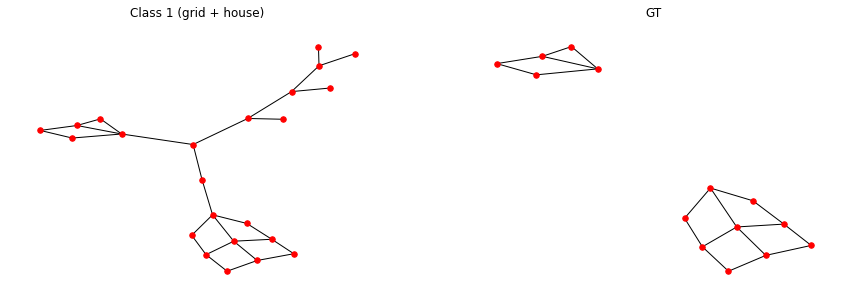

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Class 1 (grid + house)")
pos = nx.spring_layout(g,seed=13)
nx.draw(g,pos=pos,node_size=30,node_color="red")
plt.subplot(122)
plt.title("GT")
g = nx.from_numpy_array(adjs[1])
nx.draw(GT_subgraph,pos=pos,node_size=30,node_color="red")

in **class 0**: we have to distinguish between house or grid.  
Once we know if it is present an house or a grid, again, we know that the motif (house or grid) is combosed by the last 5 (house) or 9 (grid) nodes in the input graph  
Since both motifs are really small, we can easily chack if the are isomorphic!

In [11]:
def my_house():
    g = nx.Graph()
    g.add_edge(0,1)
    g.add_edge(1,2)
    g.add_edge(2,3)
    g.add_edge(0,3)
    g.add_edge(3,4)
    g.add_edge(2,4)
    return(g)

def my_grid():
    g = nx.Graph()
    g.add_edge(0,1)
    g.add_edge(1,2)
    g.add_edge(0,3)
    g.add_edge(1,4)
    g.add_edge(2,5)
    g.add_edge(3,4)
    g.add_edge(4,5)
    g.add_edge(3,6)
    g.add_edge(4,7)
    g.add_edge(5,8)
    g.add_edge(6,7)
    g.add_edge(7,8)
    return g


def is_house(g):
    start_GT = len(g.nodes())-5
    GT_subgraph = nx.subgraph(g,range(start_GT,len(g.nodes())))
    HOUSE = my_house()
    return nx.is_isomorphic(HOUSE,GT_subgraph)
def is_grid(g):
    start_GT = len(g.nodes())-9
    GT_subgraph = nx.subgraph(g,range(start_GT,len(g.nodes())))
    GRID = my_grid()
    return nx.is_isomorphic(GRID,GT_subgraph)

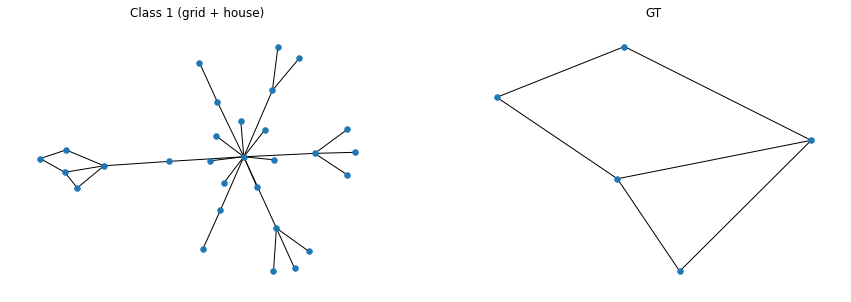

In [12]:
# house case
g = nx.from_numpy_array(adjs[0])

if is_house(g):
    GT_subgraph = nx.subgraph(g,range(len(g.nodes())-5,len(g.nodes())))
elif is_grid(g):
    GT_subgraph = nx.subgraph(g,range(len(g.nodes())-9,len(g.nodes())))
else:
    print("error")
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Class 1 (grid + house)")
pos = nx.spring_layout(g,seed=14)
nx.draw(g,pos=pos,node_size=30)
plt.subplot(122)
plt.title("GT")
g = nx.from_numpy_array(adjs[1])
nx.draw(GT_subgraph,pos=pos,node_size=30)

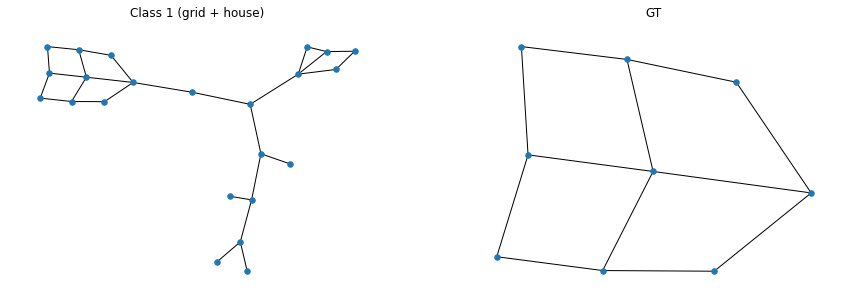

In [13]:
# grid case
g = nx.from_numpy_array(adjs[1])

if is_house(g):
    GT_subgraph = nx.subgraph(g,range(len(g.nodes())-5,len(g.nodes())))
elif is_grid(g):
    GT_subgraph = nx.subgraph(g,range(len(g.nodes())-9,len(g.nodes())))
else:
    print("error")
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Class 1 (grid + house)")
pos = nx.spring_layout(g,seed=14)
nx.draw(g,pos=pos,node_size=30)
plt.subplot(122)
plt.title("GT")
g = nx.from_numpy_array(adjs[1])
nx.draw(GT_subgraph,pos=pos,node_size=30)

# stars 

In [17]:
with open('ER-nb_stars2.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)
    
GT = np.load("ER-nb_stars-GT2.npy")

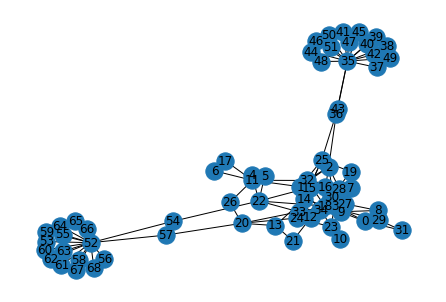

In [21]:
g = nx.from_numpy_array(adjs[1])
nx.draw(g,with_labels=True)

### get the GT

In [37]:
pos = 1
g = nx.from_numpy_array(adjs[pos])
GTg0 = GT[pos]

colors = []
for n in g.nodes():
    if n >= GTg0:
        g.nodes()[n]["GT"] = 1
        colors.append("red")
    else:
        g.nodes()[n]["GT"] = 0
        colors.append("blue")

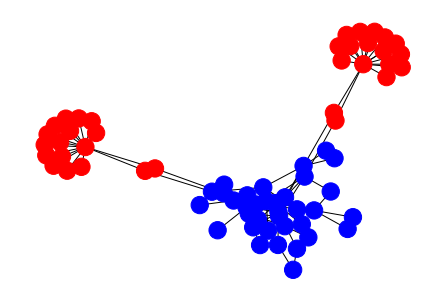

In [38]:
nx.draw(g,node_color=colors)

# House color

In [41]:
with open('BA-houses_color.pkl','rb') as fin:
    (adjs, feas, labels,GT) = pkl.load(fin)

In [46]:
A = adjs[0]
x = feas[0]
gt = GT[0]

In [47]:
g = nx.from_numpy_array(A)
for i in range(len(g.nodes())):
    
    g.nodes()[i]["x"] = x[i]

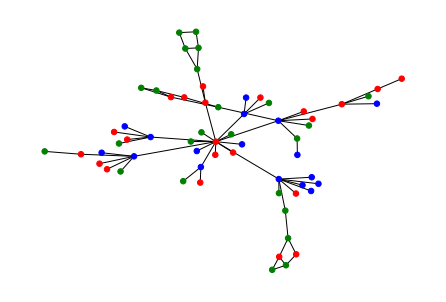

In [56]:
# convert to color 
color =  []
for c in list(nx.get_node_attributes(g,"x").values()):
    if c[0] == 1:
        color.append("green")
    if c[1] == 1:
        color.append("blue")
    if c[2] == 1:
        color.append("red")

pos = nx.spring_layout(g,seed=10)
nx.draw(g,node_color=color,pos=pos,node_size=30)